# PROGRAMMING ASSIGNMENT3

###### Question1 and Question2 both are based on same function and interlinked to each other so ouput are provided at last. 

In [358]:
#Importing all necessary libraries to implement our model
import numpy as np                                 # Python library for data
import pandas as pd                                # Python library for numerical computation
import matplotlib.pyplot as plt                    # Python library for plotting data
from sklearn.preprocessing import StandardScaler


In [359]:
class Logistic_Regression(object):
    
#Below function Intialize the value for learning rate and number of interation in logistic regression.
#The learning rate is a hyperparameter that controls change in the model in response to the estimated error each time the model weights are updated.
    def __init__(Logistic_reg, Learning_rate=0.01, number_of_iteration=100): 
        Logistic_reg.Learning_rate = Learning_rate                          
        Logistic_reg.number_iteration = number_of_iteration
        
#Below function Computing the sigmoid value of the given paramters for this logistic regrssion model.         
    def sigm_fun(Logistic_reg, x):
        output = 1 / (1 + np.exp(-x))
        return output
    
#Below function computing the cost value of the logistic regression model.   
    def cost_fun(Logistic_reg,h,model_weights, y): # The fuctions calculates the cost value
        m = len(y)
        cost = (1 / m) * (np.sum(-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))))
        return cost
    
#After getting the cost value of the function using gradient descent method below function computing the model weights(Theta). 
    def gradient_fun(Logistic_reg,X,h,model_weights,y,m): 
        gradient_output = np.dot(X.T, (h - y)) / m
        model_weights -= Logistic_reg.Learning_rate * gradient_output
        return model_weights

#We need to use predict data to build our model so below function first computing the optimal weights for the model based on predicted data.  
#Every time function takes different values.
    def fit(Logistic_reg, X, y):
        print("Running...Please Wait")
        Logistic_reg.model_weights = []
        Logistic_reg.cost = []
        X = np.insert(X, 0, 1, axis=1)
        m = len(y)
        for i in np.unique(y): 
            y_onevsall = np.where(y == i, 1, 0)
            model_weights = np.zeros(X.shape[1])
            cost = []
            for _ in range(Logistic_reg.number_iteration):
                z = X.dot(model_weights)
                h = Logistic_reg.sigm_fun(z)
                model_weights = Logistic_reg.gradient_fun(X,h,model_weights,y_onevsall,m)
                cost.append(Logistic_reg.cost_fun(h,model_weights,y_onevsall)) 
            Logistic_reg.model_weights.append((model_weights, i))
            Logistic_reg.cost.append((cost,i))
        return Logistic_reg,Logistic_reg.model_weights

#After calcultaing the model weights value we need to classify the invidual features based on our needs.
#Below function classfied the individal features for predicted value. 
    def predict_fun(Logistic_reg, X): 
        X = np.insert(X, 0, 1, axis=1)
        X_predicted = [max((Logistic_reg.sigm_fun(i.dot(model_weights)), c) for model_weights, c in Logistic_reg.model_weights)[1] for i in X ]        
        return X_predicted
    
#Below function comparing the values between the predicted label and actual label.It gives model Accuracy.
# To find the model performace based on the data.
    def score_fun(Logistic_reg,X, y): 
        score = sum(Logistic_reg.predict_fun(X) == y) / len(y)
        return score
    
#Below funtion plotting cost function graph for its different value.
#This function plots converge garph.
    def plt_cost(Logistic_reg,costh): 
        for cost,c in costh   :
                plt.plot(range(len(cost)),cost,'g')
                plt.title("Gradient Graph for species -" + str(c) +" vs All")
                plt.xlabel("Number of Iterations")
                plt.ylabel("Cost(Error)")
                plt.show()


In [360]:
#Reading data from CSV file
Dataset = pd.read_csv('Fish.csv')
print(Dataset)

    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [361]:
#Split the data in X and Y. 
#Y lable take output as species and X label takes all other columns from the dataset.
y_Dataset = Dataset['Species'].values  
X = Dataset.drop(['Species'],axis=1).values


In [362]:
#Below Function normalizing data. 
Normalizer = StandardScaler()
X= Normalizer.fit_transform(X)
#print(X)


In [363]:
#Library for spliting the data into train data and test data. 
from sklearn.model_selection import train_test_split
#X_train.shape


In [364]:
#y_test.shape

In [365]:
#Train onevsall model.
for _ in range (6):
#Here we are taking Weight,Lenght1,Length2,Length3,Width and Height as an input features and Every time model plots onevsall graph for one inputfeature and one species.    
    X_train,X_test,y_train,y_test = train_test_split(X,y_Dataset,test_size = 0.6)
    log_reg, model_coefficients= Logistic_Regression(number_of_iteration=10000).fit(X_train, y_train)
    prediction_output = log_reg.predict_fun(X_test)
    Train_Accuracy = log_reg.score_fun(X_train,y_train)
    Test_Accuracy = log_reg.score_fun(X_test,y_test)
    
    print("\n")
    print("Train accuracy of the model is: ",Train_Accuracy)
    print("Test accuracy of the model is: ",Test_Accuracy)
    print("\n")


Running...Please Wait


Train accuracy of the model is:  0.7777777777777778
Test accuracy of the model is:  0.8229166666666666


Running...Please Wait


Train accuracy of the model is:  0.7777777777777778
Test accuracy of the model is:  0.8229166666666666


Running...Please Wait


Train accuracy of the model is:  0.8095238095238095
Test accuracy of the model is:  0.8020833333333334


Running...Please Wait


Train accuracy of the model is:  0.7777777777777778
Test accuracy of the model is:  0.7395833333333334


Running...Please Wait


Train accuracy of the model is:  0.8095238095238095
Test accuracy of the model is:  0.7708333333333334


Running...Please Wait


Train accuracy of the model is:  0.7936507936507936
Test accuracy of the model is:  0.7708333333333334




Plotted OneVsAll Graph For Each Sepcies


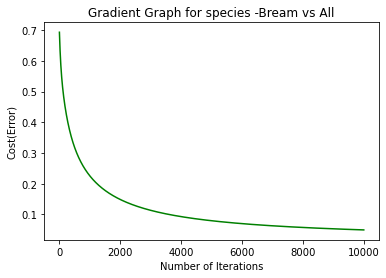

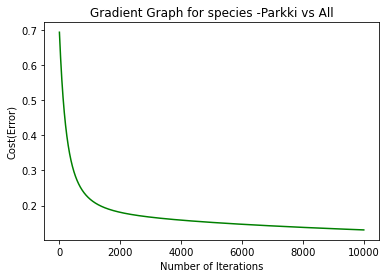

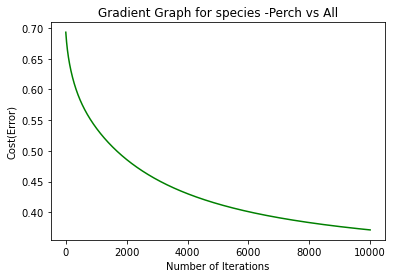

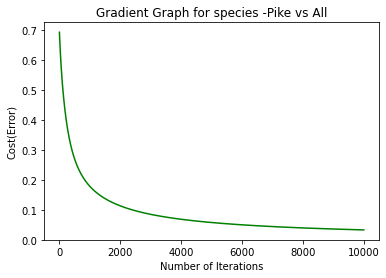

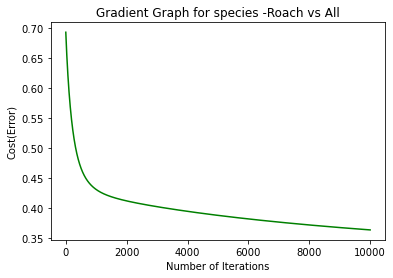

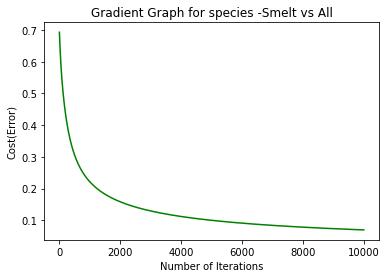

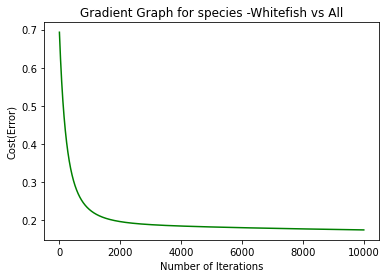

In [366]:
#Plotting onevsall graph for each species.
print("Plotted OneVsAll Graph For Each Sepcies")
log_reg.plt_cost(log_reg.cost)

In [367]:
#Print model coefficient for each
print("Model Coefficient:", model_coefficients)

Model Coefficient: [(array([-2.85583294, -0.22090891, -0.60863628, -0.4659662 ,  0.52356238,
        4.21885341, -0.96673728]), 'Bream'), (array([-3.57868422, -0.51114553, -0.54770527, -0.55380907, -0.53644634,
        1.64936213, -0.57989236]), 'Parkki'), (array([-1.08001890e+00, -1.79230645e-01, -2.46444951e-03,  2.09420447e-01,
       -1.62584923e+00, -2.05971120e+00,  3.59271674e+00]), 'Perch'), (array([-3.5081653 , -0.62620353,  1.62344372,  1.56811619,  1.50858637,
       -1.63867429, -1.55047981]), 'Pike'), (array([-2.1199602 , -2.02925959, -0.27664354, -0.49623357,  0.45918269,
       -0.25853844,  1.1753425 ]), 'Roach'), (array([-4.45065201,  1.07096418, -0.30804231, -0.44482139, -0.48356816,
       -1.27402111, -1.92231429]), 'Smelt'), (array([-3.06406128, -0.47859955, -0.27832368, -0.15198106, -0.07253492,
       -0.03234193,  1.03230761]), 'Whitefish')]


In [368]:
#Below Function Gives output for actual value and predicted value. 
Output_Prediction = pd.DataFrame({
    'TestValue':y_test,
    'PredictedValue':prediction_output
})
print(Output_Prediction)

   TestValue PredictedValue
0      Roach          Perch
1       Pike           Pike
2      Bream          Bream
3      Perch          Roach
4      Bream          Bream
..       ...            ...
91     Perch          Perch
92      Pike           Pike
93      Pike           Pike
94     Bream          Bream
95     Perch          Perch

[96 rows x 2 columns]
